In [14]:
import pandas as pd
import seaborn as sns
from joblib import load, dump
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [16]:
resultados = load("../../trained_models/grid_search/grid_search.pkl")
columns_grid_search = ['numero_de_componentes', 'numero_features',
                                     'maximum_df','l1_ratio', 'score_num']

In [17]:
df_resultados = pd.DataFrame(index=[i for i in range(len(resultados))],
                            columns=columns_grid_search)
for row in range(len(df_resultados)):
    df_resultados.iloc[row,:] = [val for val in resultados[:][row].values()]
df_resultados =  df_resultados.apply(pd.to_numeric)
df_resultados = df_resultados.sort_values(['score_num'],ascending=False)

In [18]:
df_resultados.head(20)

,numero_de_componentes,numero_features,maximum_df,l1_ratio,score_num
9,200,2500,0.3,0.5,0.068061
15,600,1000,0.3,0.5,0.067533
13,200,20000,0.3,0.5,0.067463
3,100,5000,0.3,0.5,0.065842
10,200,5000,0.3,0.5,0.064539
12,200,10000,0.3,0.5,0.064469
11,200,7500,0.3,0.5,0.063905
2,100,2500,0.3,0.5,0.061757
8,200,1000,0.3,0.5,0.061052
14,600,700,0.3,0.5,0.059432


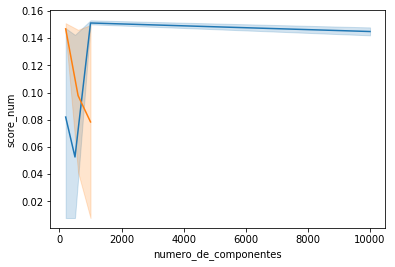

In [13]:
cmap = sns.cubehelix_palette(as_cmap=True)
ax = sns.lineplot(x="numero_features", y="score_num", data=df_resultados)
ax = sns.lineplot(x="numero_de_componentes", y="score_num", data=df_resultados)

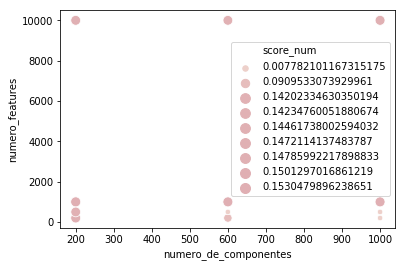

In [51]:
cmap = sns.cubehelix_palette( as_cmap=True)
ax = sns.scatterplot(x="numero_de_componentes", y="numero_features",
                      hue="score_num", size="score_num",
                      sizes=(30, 100), hue_norm=(0, 1),
                      legend="full", data=df_resultados)

Normalizamos es DF

In [52]:
x = df_resultados.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_resultados = pd.DataFrame(x_scaled)
df_resultados.columns = columns_grid_search

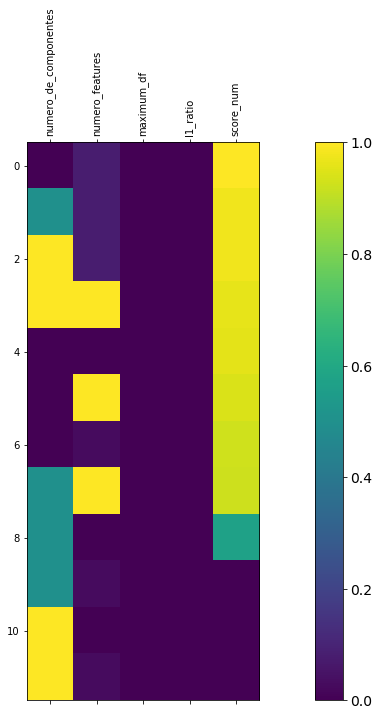

In [53]:
f = plt.figure(figsize=(20, 10))
plt.matshow(df_resultados, fignum=f.number)
plt.xticks(range(df_resultados.shape[1]), df_resultados.columns, fontsize=10, rotation=90)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)